In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/yash-jadhav/ML/Student-Performance-ML/notebook/data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
print("Gender:-")
print(df['gender'].unique())

print("Different Race Ethnicities:-")
print(df['race_ethnicity'].unique())

print("Levels of Parents Education:-")
print(df['parental_level_of_education'].unique())

print("Types of lunch:-")
print(df['lunch'].unique())

print("Type of test preparation:-")
print(df['test_preparation_course'].unique())

Gender:-
['female' 'male']
Different Race Ethnicities:-
['group B' 'group C' 'group A' 'group D' 'group E']
Levels of Parents Education:-
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Types of lunch:-
['standard' 'free/reduced']
Type of test preparation:-
['none' 'completed']


### Add columns for total score and Average

In [10]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 1) Histogram

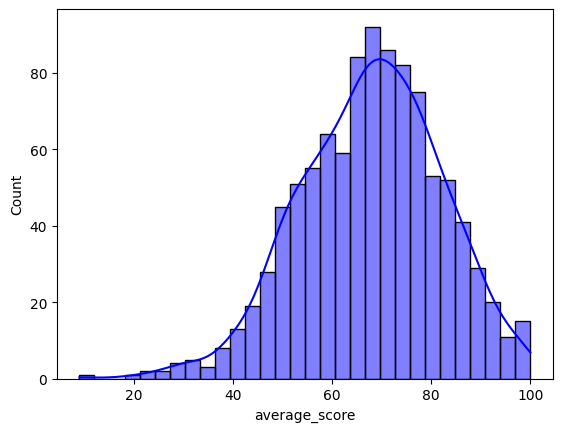

In [29]:
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, color = 'blue')
plt.show()

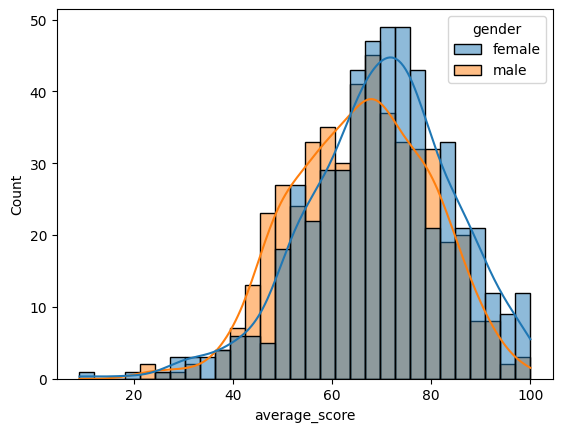

In [28]:
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'gender')
plt.show()

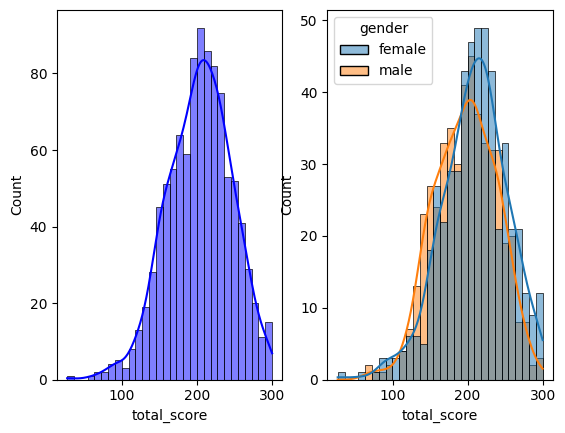

In [38]:
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, hue = 'gender')
plt.show()

#### Insights:-
- Female students tend to have more average score and total score

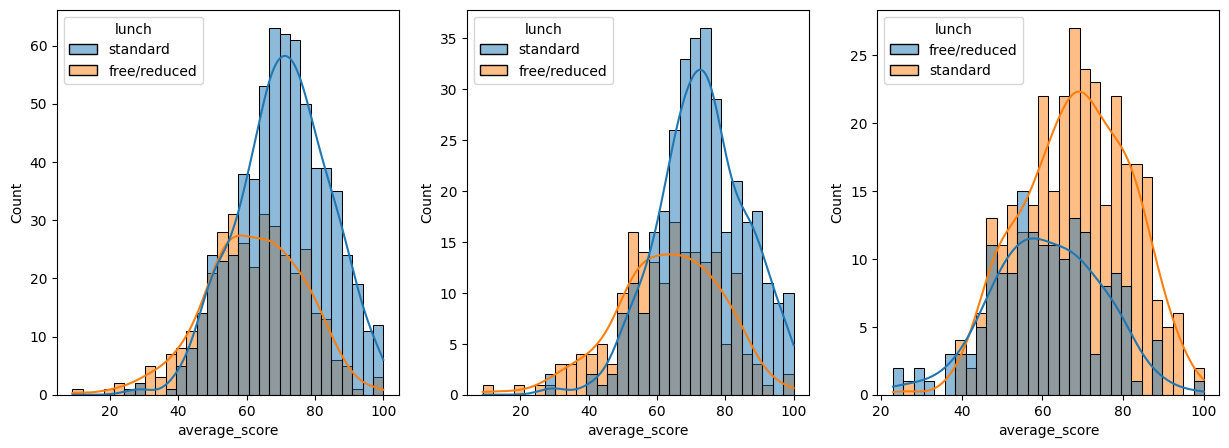

In [46]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', bins=30, kde=True, hue='lunch')
plt.show()

#### Insights:-
- Students having standard lunch perform irrespective of their gender

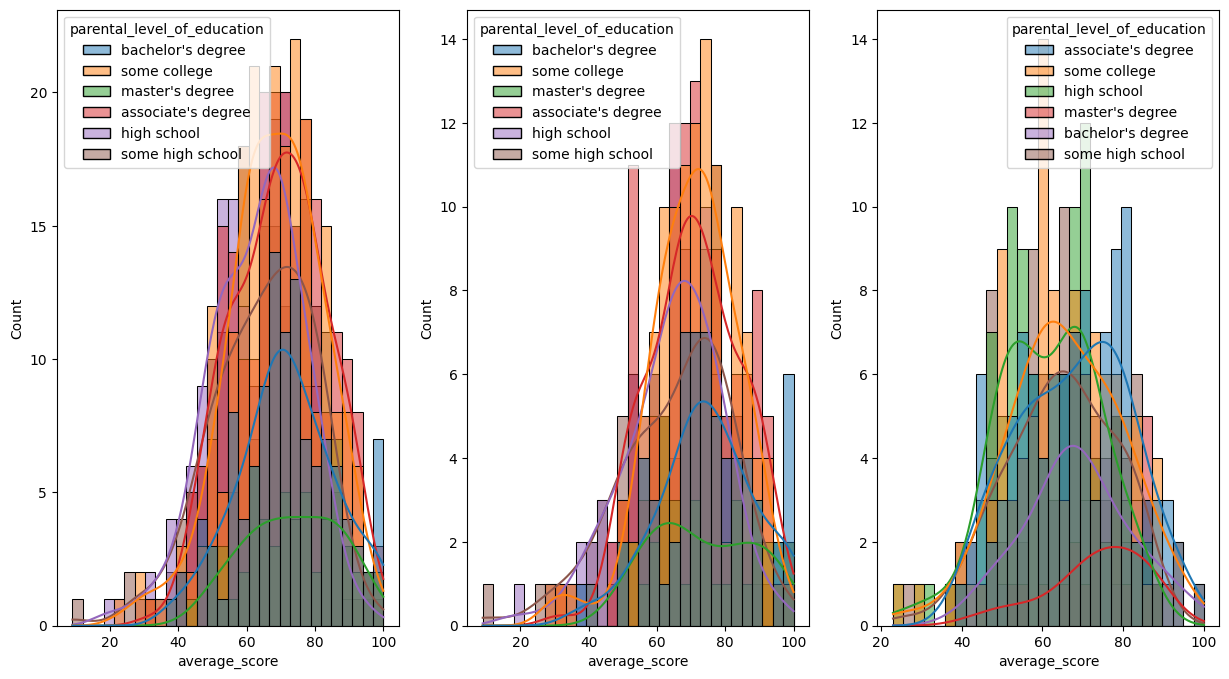

In [ ]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131) 
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.show()

#### Insights:-
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

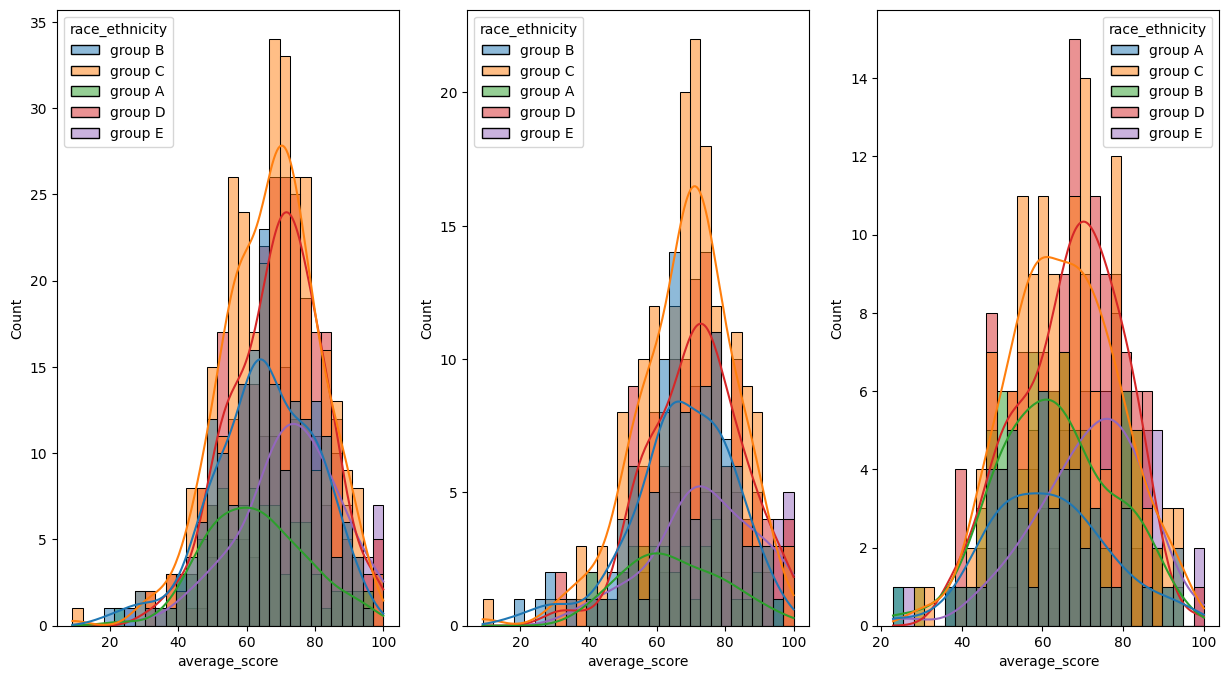

In [54]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131) 
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', bins=30, kde=True, hue='race_ethnicity')
plt.show()

#### Insights:-
- Students of group A and B tend to perform poorly in exam irrespective of their gender

# 2) Violin Plot

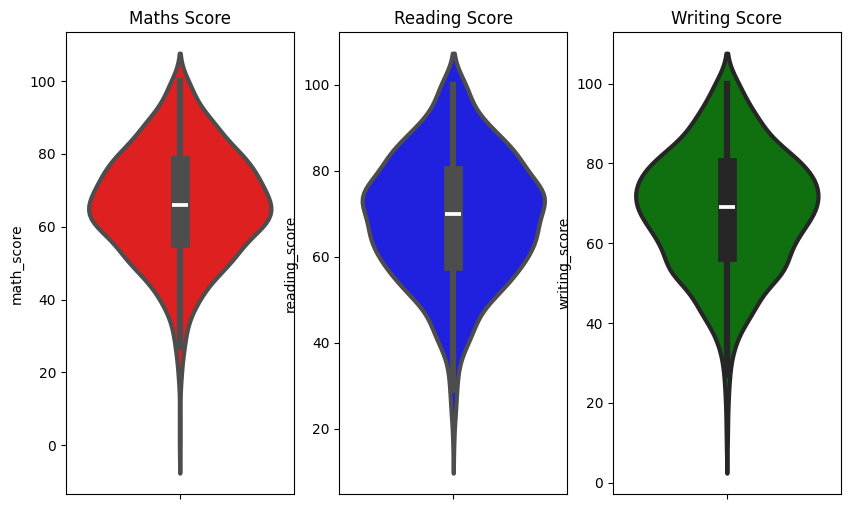

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title("Maths Score")
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(y='reading_score', data=df, color='blue', linewidth=3)
plt.subplot(133)
plt.title("Writing Score")
sns.violinplot(y='writing_score', data=df, color='green', linewidth=3)
plt.show()

#### Insights:-
- Most of the students score between 60-80 in maths, reading and writing

# 3) Pie Plot

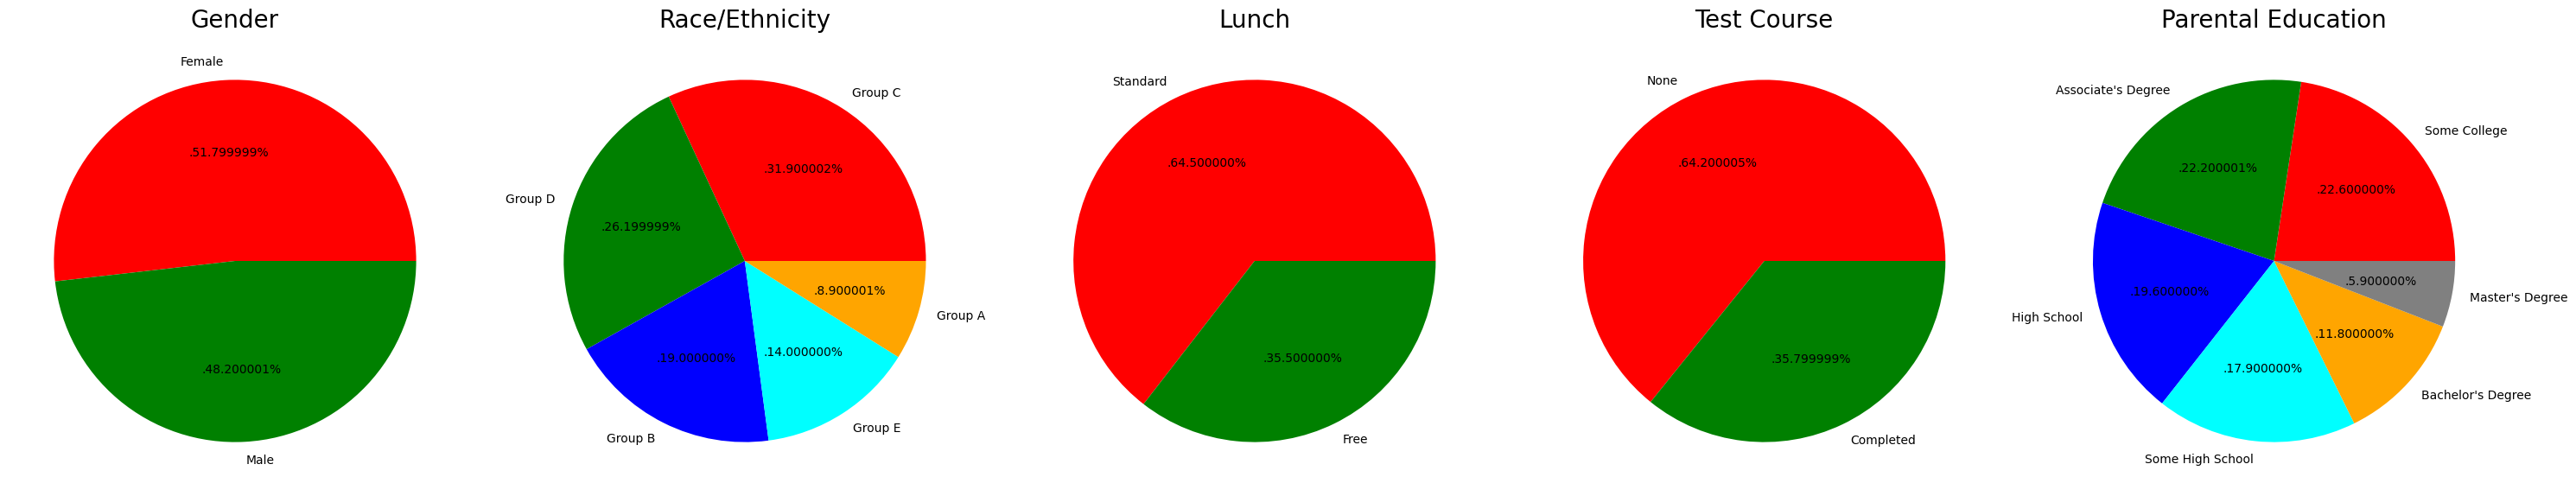

In [66]:
plt.rcParams['figure.figsize'] = (30, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights:-
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


# 4) Count Plot

##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

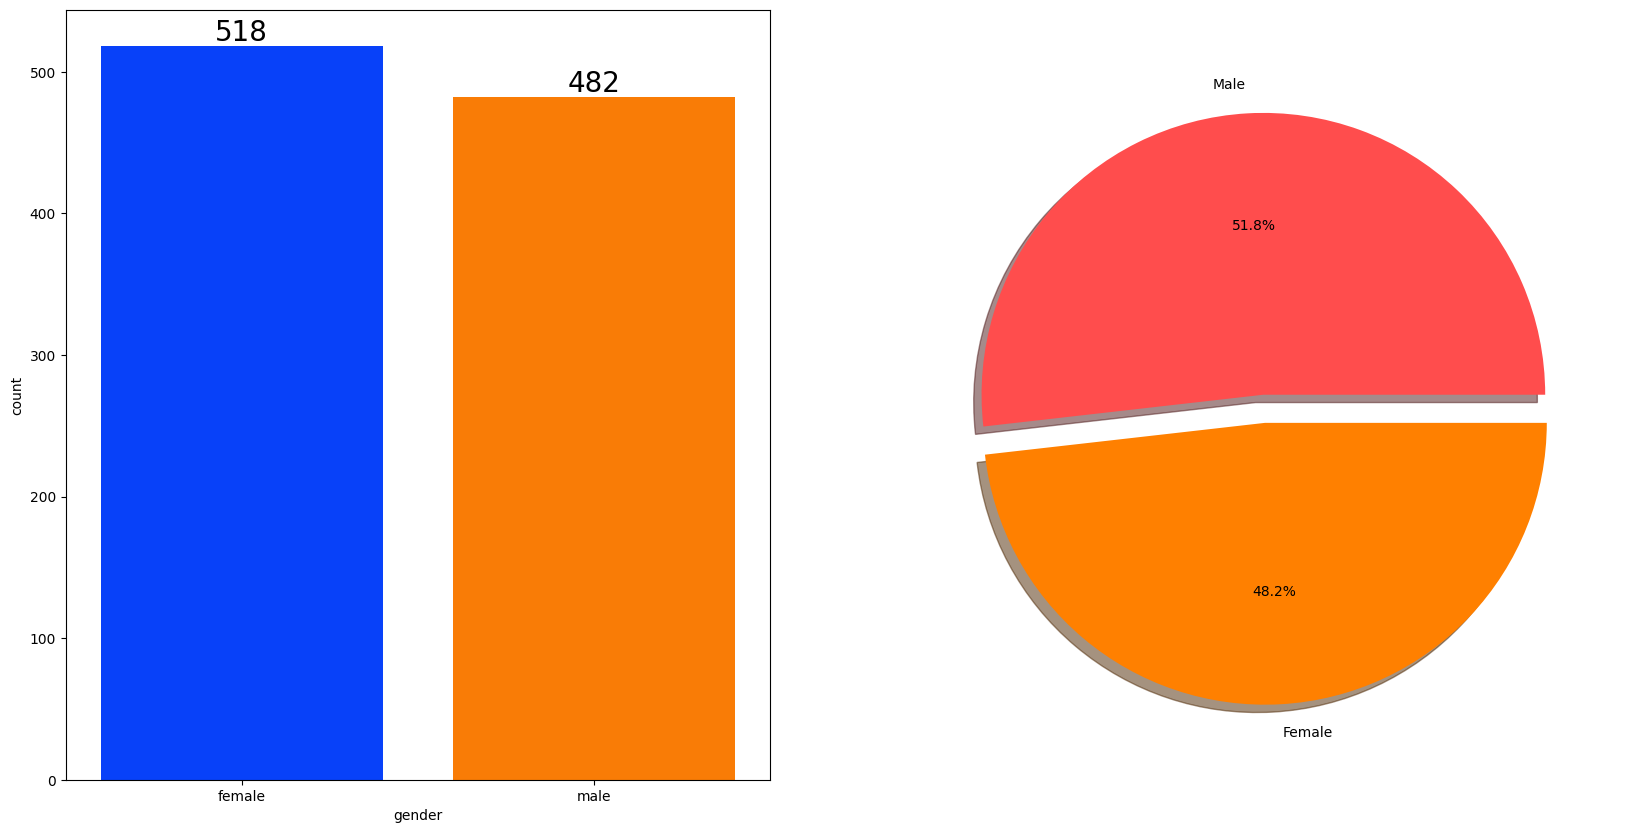

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95, hue='gender')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights:-
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

##### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [20]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


/tmp/ipykernel_6110/984186320.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
/tmp/ipykernel_6110/984186320.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]


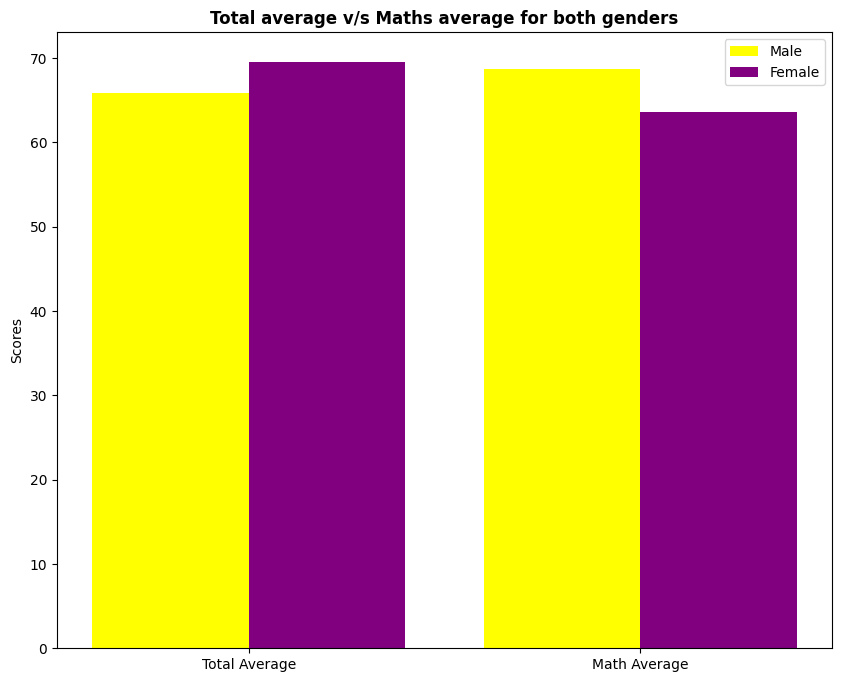

In [23]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male', color='yellow')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female', color='purple')

plt.xticks(X_axis, X)
plt.ylabel('Scores')
plt.title('Total average v/s Maths average for both genders', fontweight='bold')
plt.legend()
plt.show()


#### Insights:-
- On average, female students have overall better average than male students
- Male students have scored higher in Maths

##### UNIVARIATE ANALYSIS (How is Group wise distribution?)

/tmp/ipykernel_6110/3655343863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)


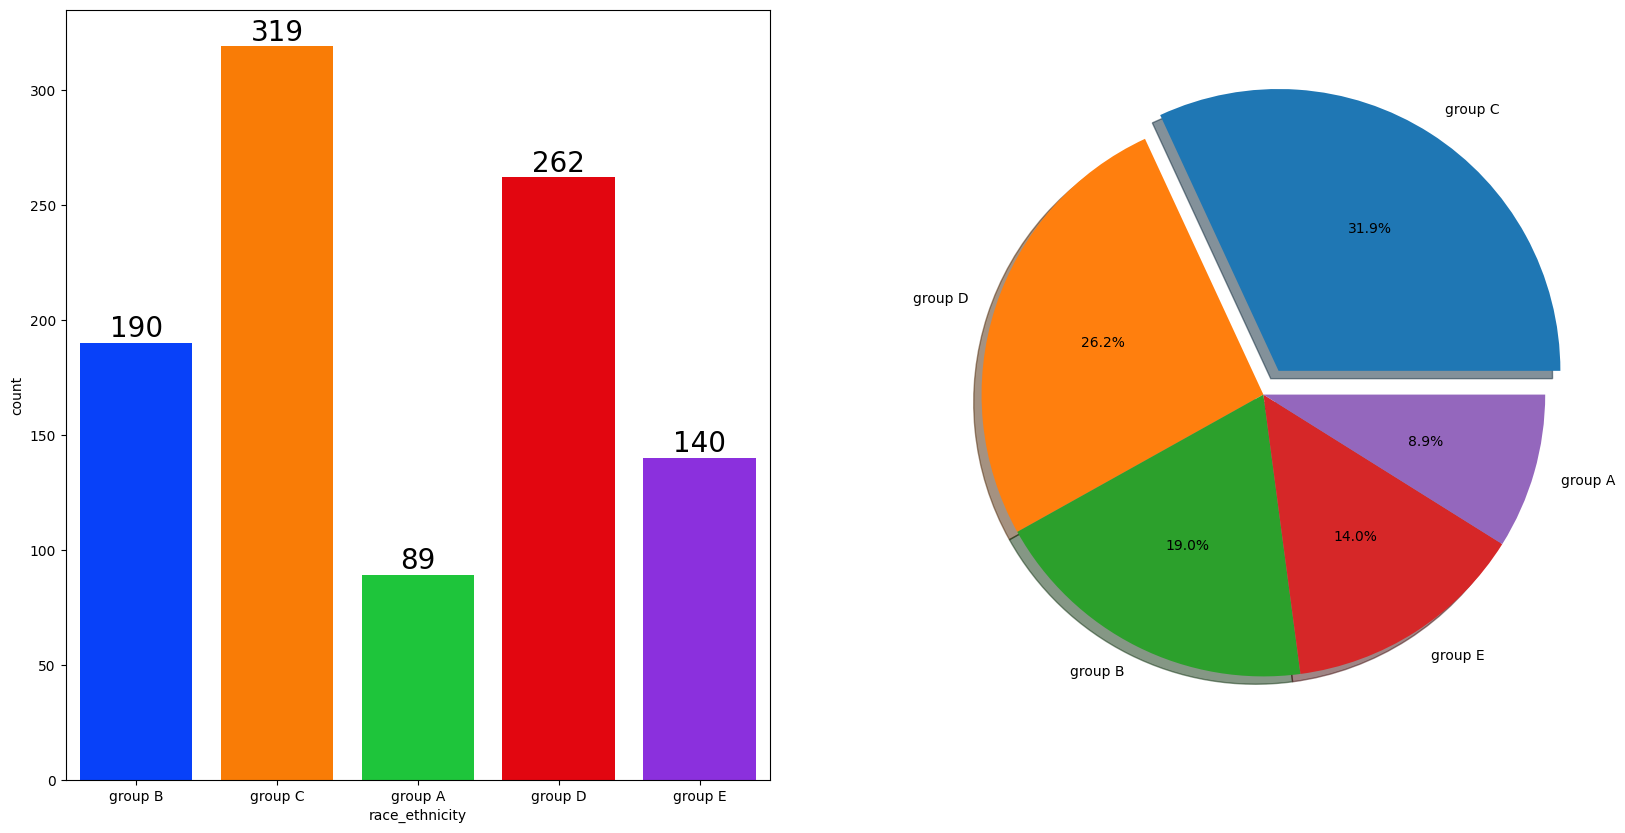

In [24]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights:-
- Most of the students belong to group C and group D
- Lowest number of students belong to group A

##### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

/tmp/ipykernel_6110/827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/tmp/ipykernel_6110/827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/tmp/ipykernel_6110/827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'

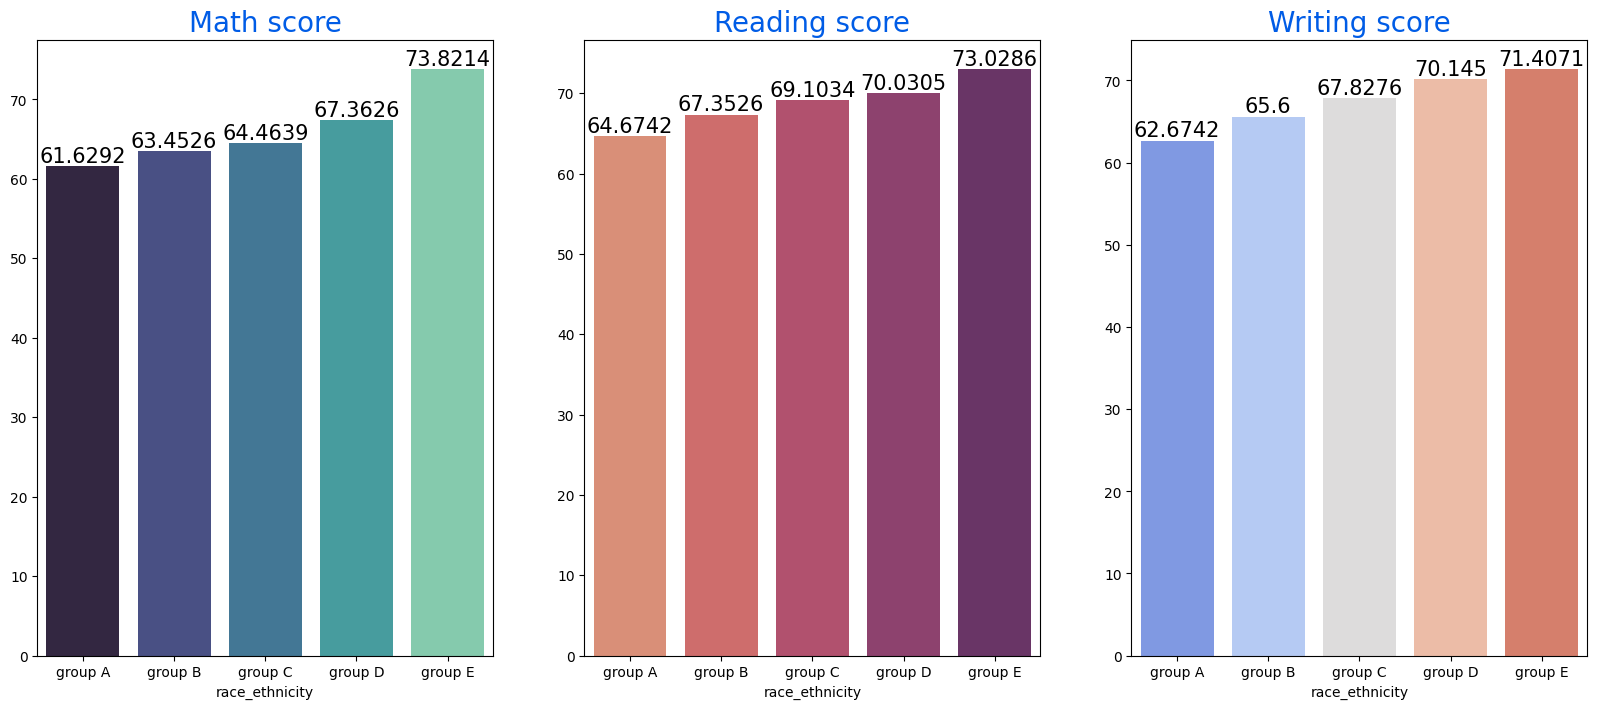

In [27]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights:-
- Group E students have scored the highest marks
- Group A students have scored the lowest marks

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

/tmp/ipykernel_6110/4115091206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


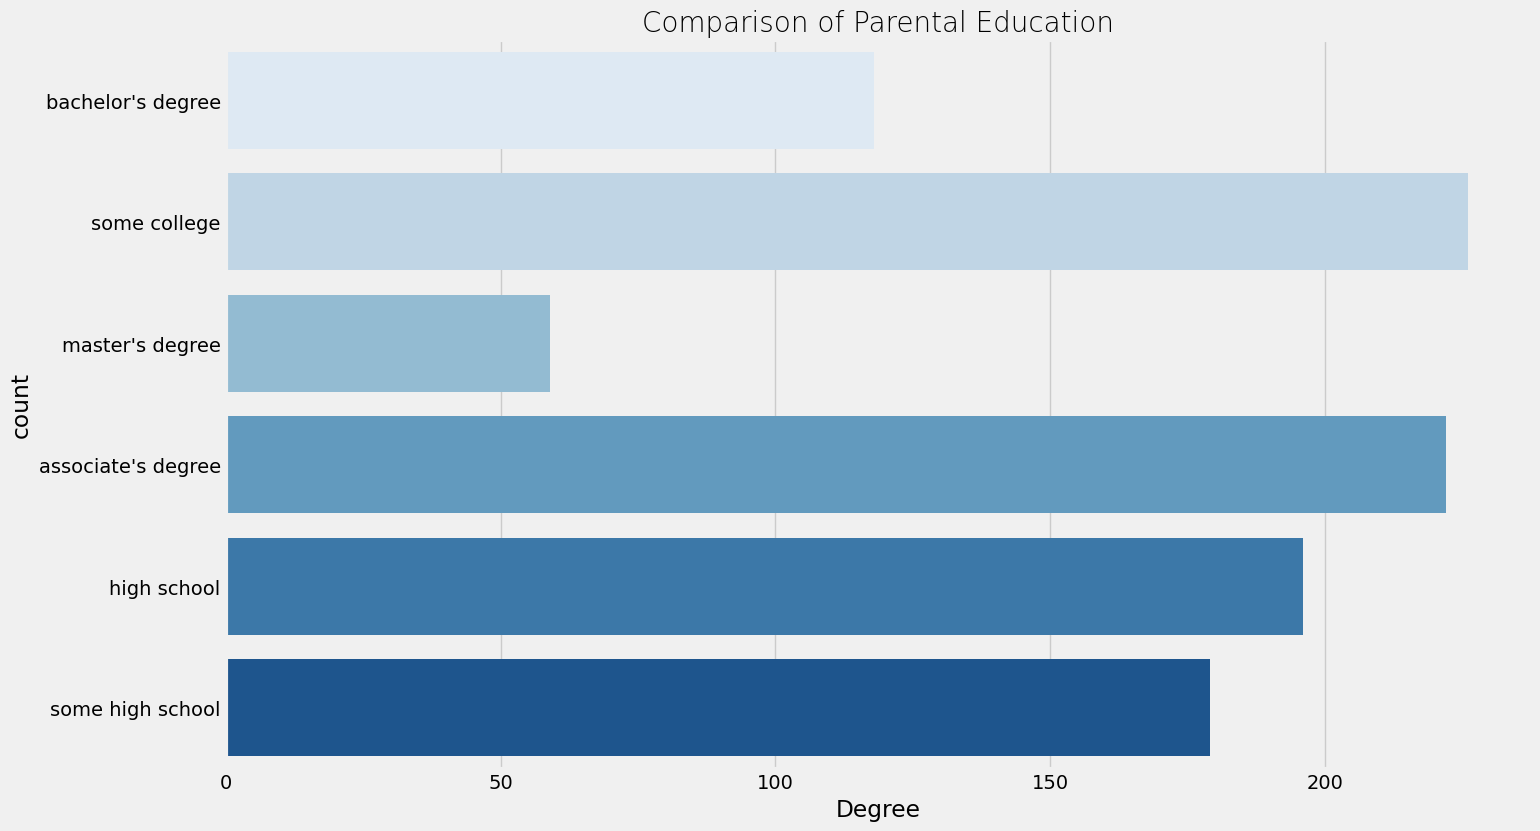

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights:-
- Largest number of parents are from some college
- Least number of parents have masters degree

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

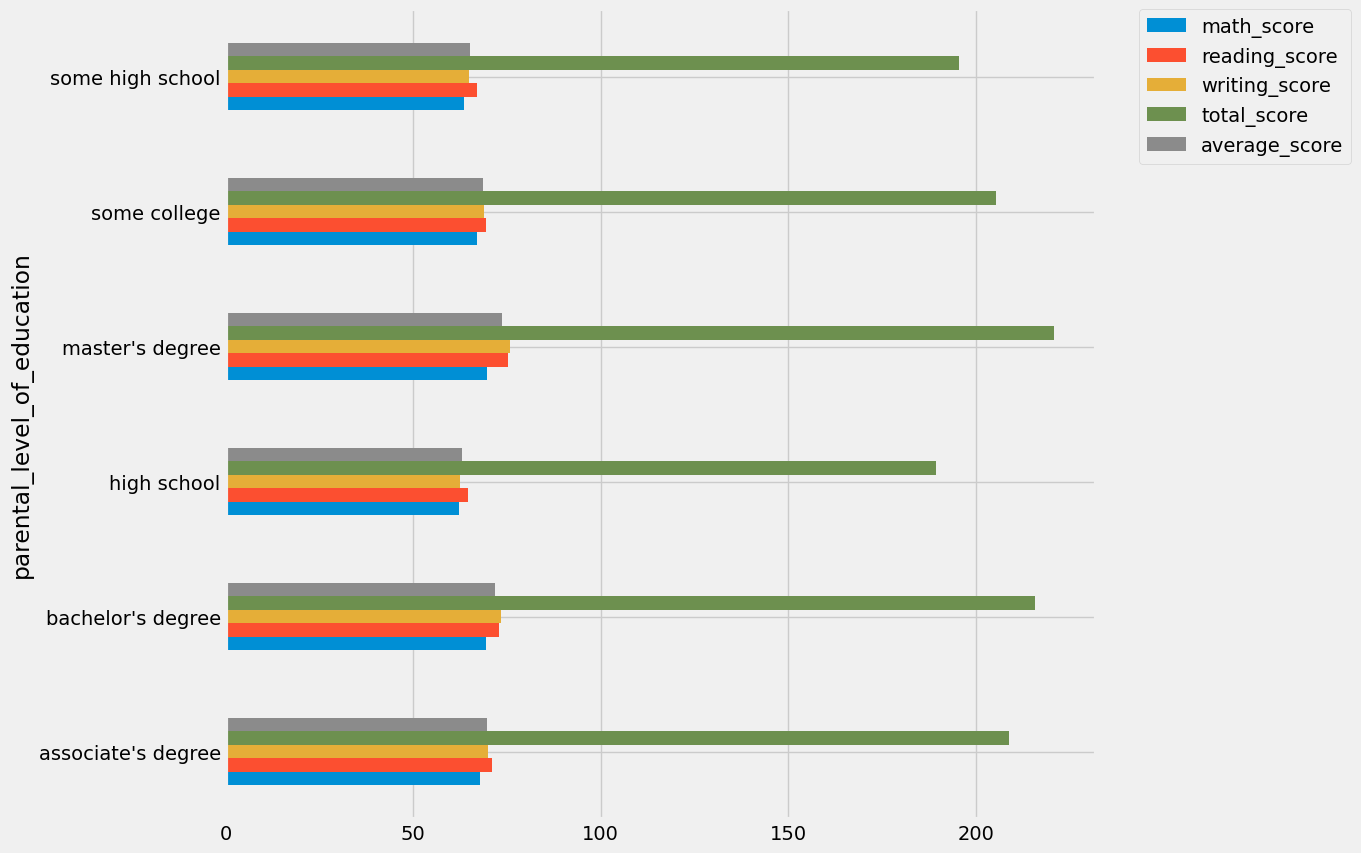

In [ ]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights:-
- The score of student whose parents possess master and bachelor level education are higher than others.

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

/tmp/ipykernel_6110/87910414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['lunch'], palette = 'PuBu')


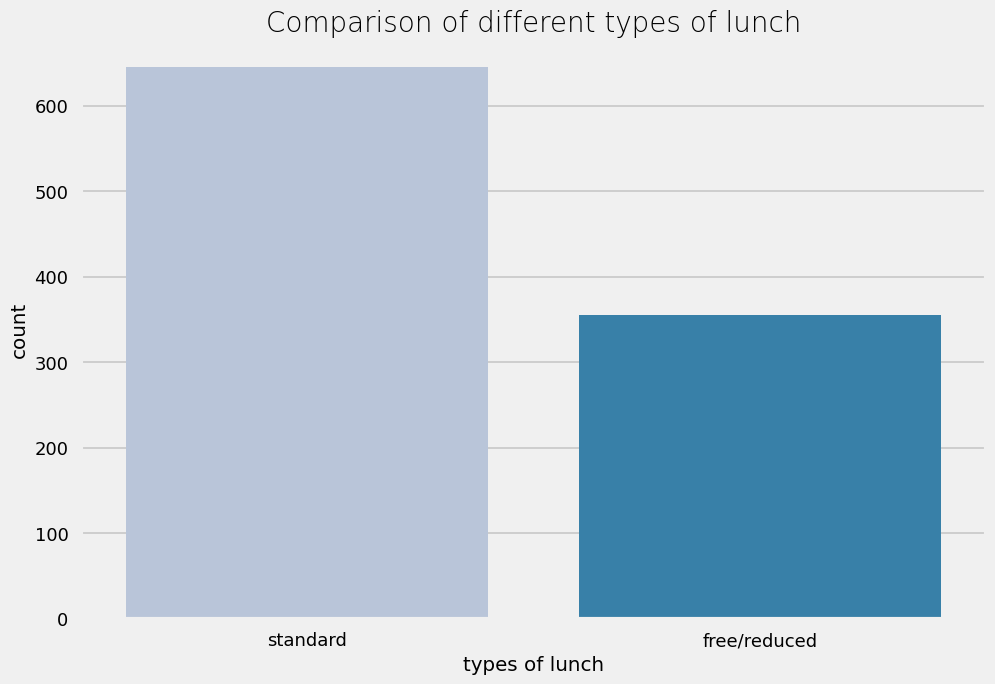

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(x = df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights:-
- Almost 2/3 students are being served with standard lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

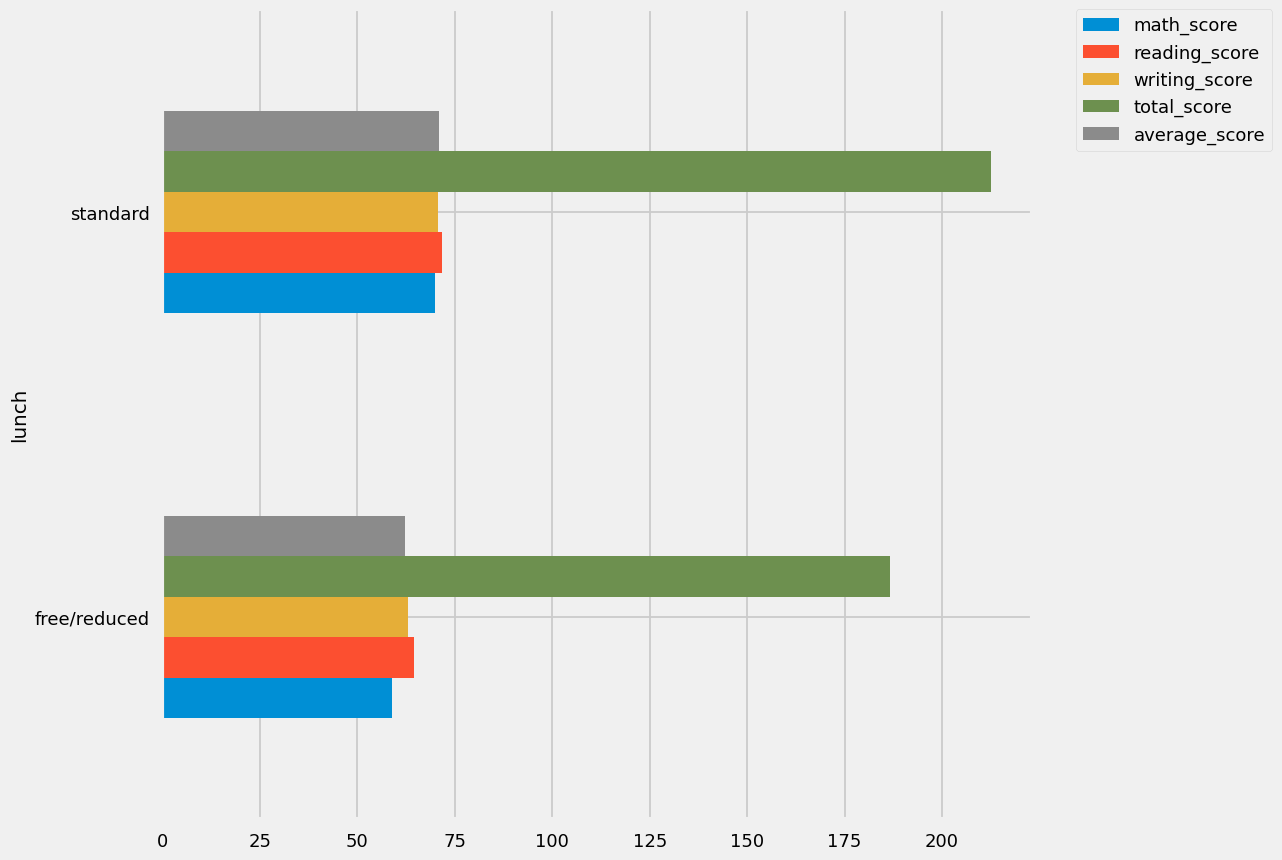

In [41]:
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights:-
- Students having standard lunch perform better

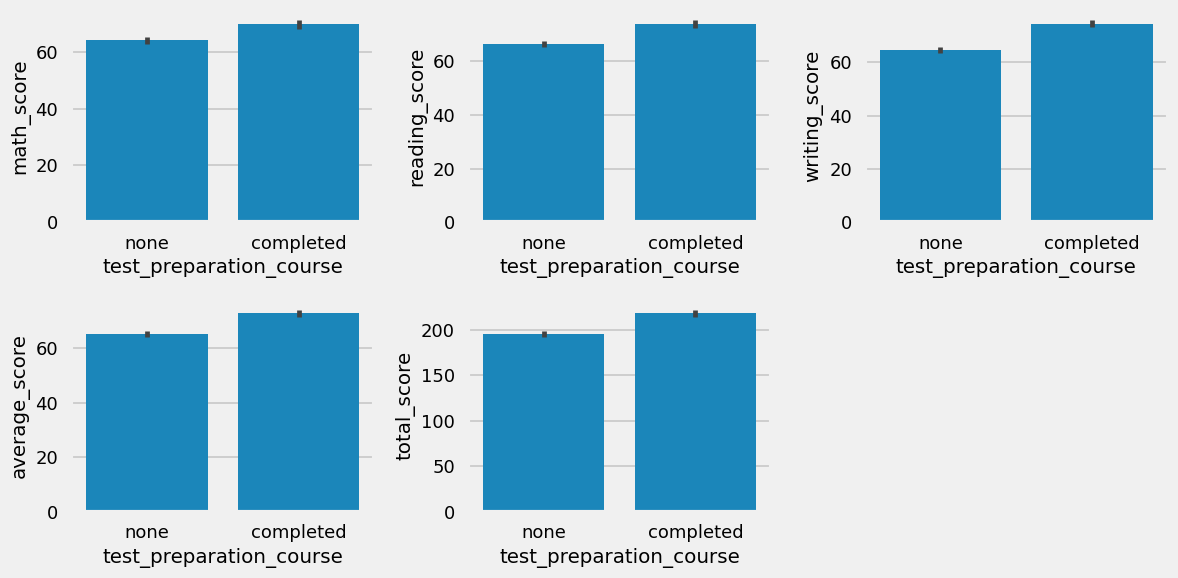

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(231)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(232)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(233)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])
plt.subplot(234)
sns.barplot (x=df['test_preparation_course'], y=df['average_score'])
plt.subplot(235)
sns.barplot (x=df['test_preparation_course'], y=df['total_score'])
plt.tight_layout()
plt.show()

#### Insights:-
- Students who have completed test preparation course have scored more

##### CHECKING OUTLIERS

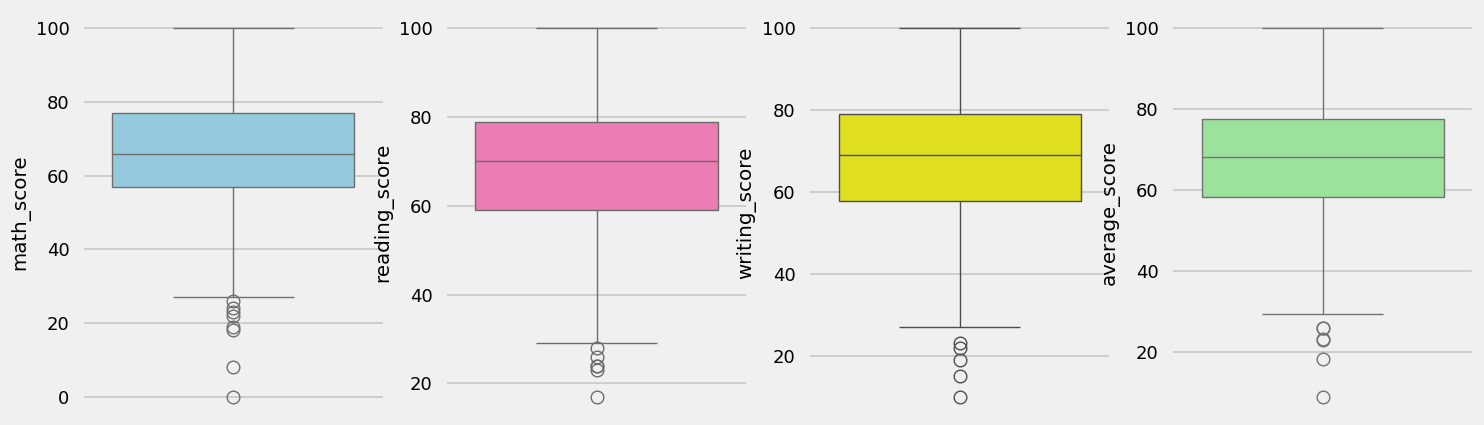

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### Insights:-
- Most of the students have scored between 60 and 80 in all subjects and average.
- The distribution is slightly skewed towards lower scores (more outliers below the box).

##### MUTIVARIATE ANALYSIS USING PAIRPLOT

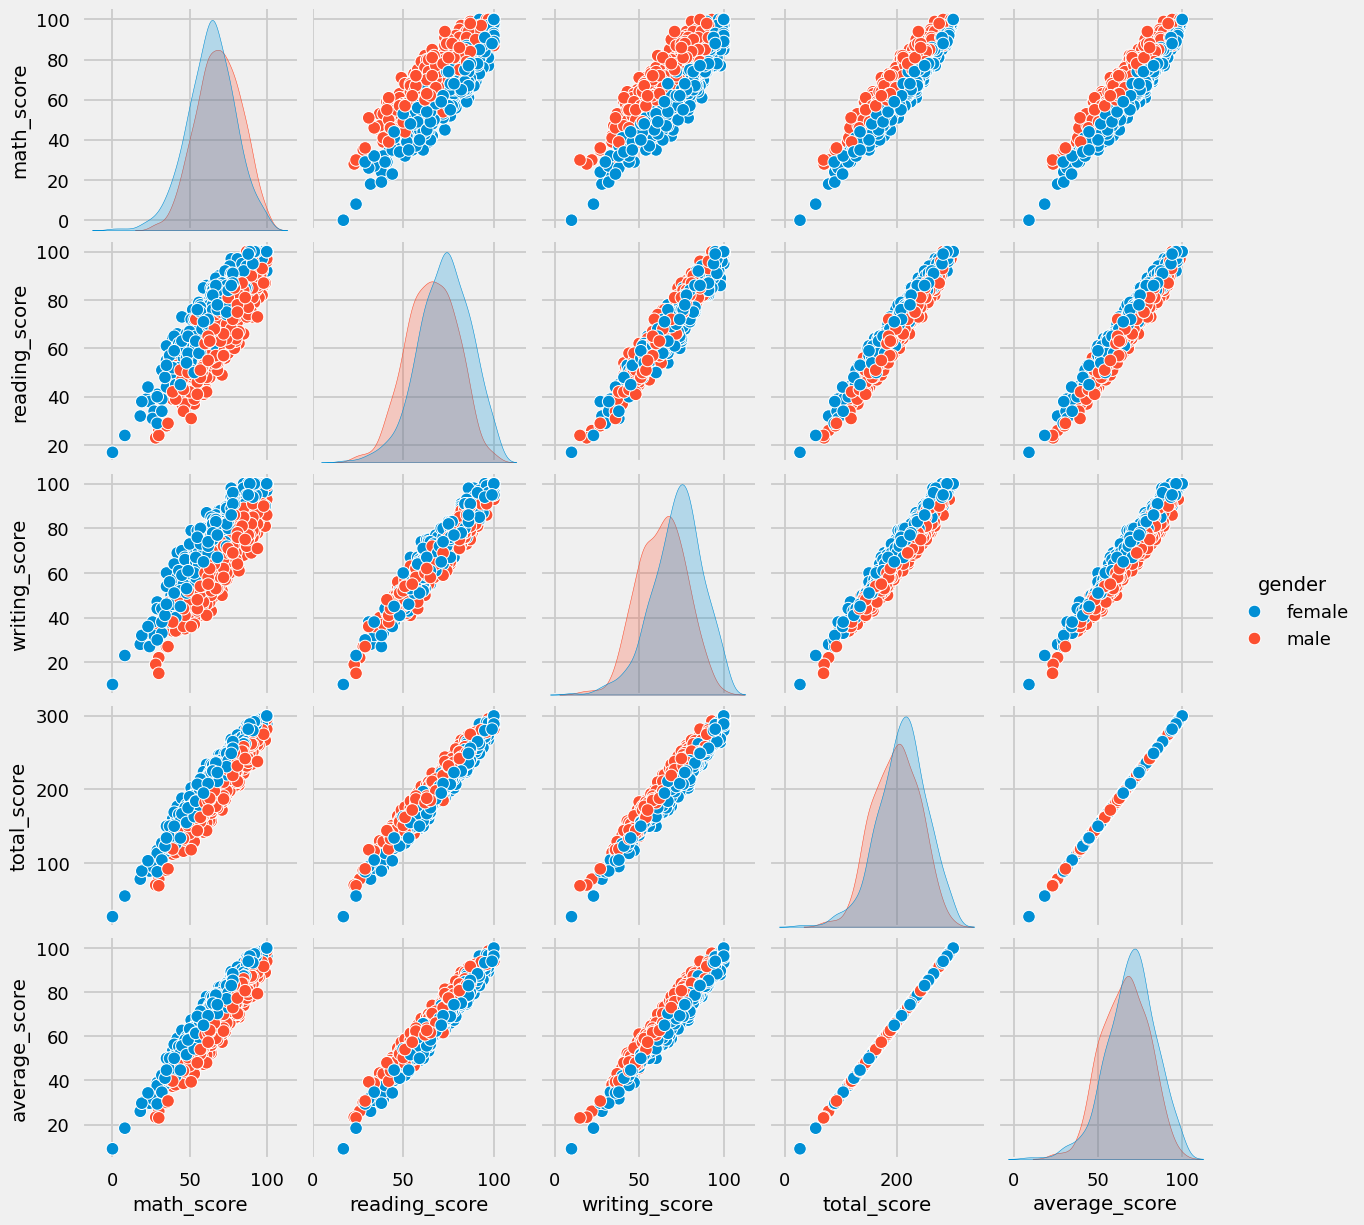

In [55]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights:-
- ALl the scores are linearly increasing with each other

# Conclusion:-
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.